In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [94]:
df = pd.read_csv("train.csv")
# Male female conversion
df["Sex"] = df["Sex"].map(lambda x: 1 if x=='male' else 0)
df.groupby('Embarked').count()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [95]:
# Only two entries with Nan in Embarked... so dropping them

df[df['Embarked'].isnull()]
# df =  df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62,0,0,113572,80,B28,NaN


In [97]:
df = df[pd.notnull(df['Embarked'])]

In [98]:
# df["Age"][df["Age"].notnull()].mean()
# df[df["Age"].notnull()].mean()
df["Age"][df["Age"].isnull()] = df["Age"][df["Age"].notnull()].mean()

/home/sharan/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
df[df["Sex"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [100]:
df["Pclass"].unique() # Thats good

array([3, 1, 2])

/home/sharan/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


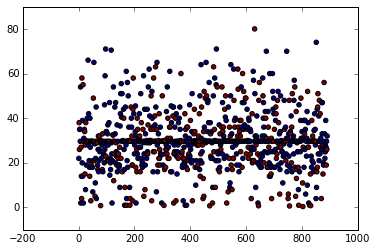

In [109]:
plt.scatter(df["PassengerId"].values,df["Age"].values, c=df["Survived"].values )
plt.show()

In [111]:
df["Sex"].unique()  # thats good

array([1, 0])

In [112]:
df["SibSp"].unique()  # thats good

array([1, 0, 3, 4, 2, 5, 8])

In [113]:
df["Parch"].unique()  # thats good

array([0, 1, 2, 5, 3, 4, 6])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


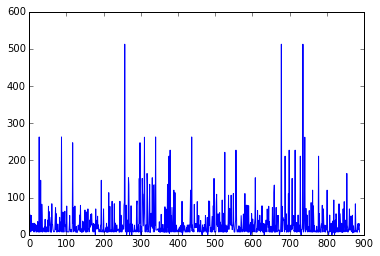

In [125]:
plt.plot(df["Fare"].values)  
df[df["Fare"].isnull()] # thats good

In [159]:
df["Cabin"].unique()  # thats  really bad so let me drop it
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

 ###   I will be dropping PassengerID, Name, Ticket, Cabin

In [161]:
drop_ele = ["PassengerId", "Name", "Ticket", "Cabin"]
df.drop(drop_ele, axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.642093,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C
